In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv('adult.csv')

data['income'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [3]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,0
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,1
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,0
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,0


In [4]:
data.replace('?', np.nan, inplace=True)
data['workclass'].fillna(data['workclass'].mode()[0], inplace=True)
data['occupation'].fillna(data['occupation'].mode()[0], inplace=True)
data['native-country'].fillna(data['native-country'].mode()[0], inplace=True)

data.head(10)

/var/folders/nh/d77k6g5179q0rccrm_042pb80000gn/T/ipykernel_33042/2407549172.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workclass'].fillna(data['workclass'].mode()[0], inplace=True)
/var/folders/nh/d77k6g5179q0rccrm_042pb80000gn/T/ipykernel_33042/2407549172.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,0
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,1
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,0
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,0


In [5]:
# Filter rows with missing price values
filtered_data = data.dropna(axis=0)

y = filtered_data.income
melbourne_features = filtered_data.columns.drop('income')
X = filtered_data[melbourne_features]

X = filtered_data.drop('income', axis=1)

X.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States


In [6]:
# column types
categorical_cols = X.select_dtypes(include='object').columns
numeric_cols = X.select_dtypes(exclude='object').columns

# Define preprocessing for columns
numeric_transformer = SimpleImputer(strategy='mean')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [7]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


results = {}

# pipeline with classifier
for name, model_algo in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('scaler', StandardScaler(with_mean=False)),
        ('classifier', model_algo)
    ])

    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    results[name] = scores.mean()
    print(f"{name} Accuracy: {scores.mean():.4f}")


LogisticRegression Accuracy: 0.8511
RandomForest Accuracy: 0.8532
KNN Accuracy: 0.8254
SVM Accuracy: 0.8494
GradientBoosting Accuracy: 0.8670


/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

XGBoost Accuracy: 0.8741


/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


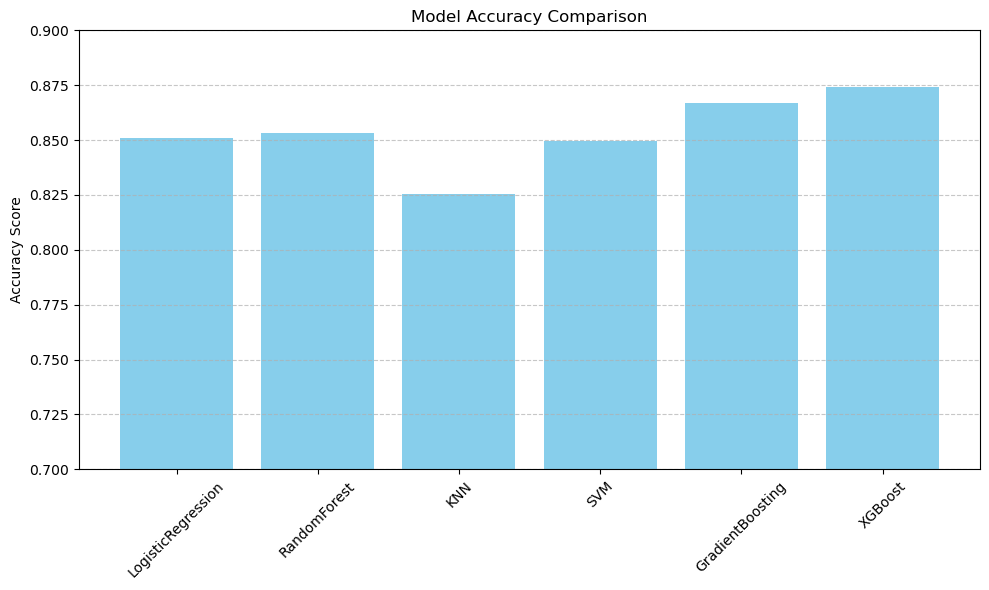

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0.7, 0.9)  # Optional: control Y-axis range for better contrast
plt.tight_layout()
plt.show()

In [9]:
best_model = max(results, key=results.get)
print("Best Model:", best_model, "with accuracy:", results[best_model])

Best Model: XGBoost with accuracy: 0.8740838701607458


In [10]:
best_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', models[best_model])
])

In [11]:
results.clear()

# Tune hyperparameter (n_estimators) if it's a boosting or forest model
if best_model in ["RandomForest", "GradientBoosting", "XGBoost"]:
    def get_score(n_estimators):
        best_pipeline.set_params(classifier__n_estimators=n_estimators)
        scores = cross_val_score(best_pipeline, X, y, cv=5, scoring='accuracy', n_jobs=-1)
        return scores.mean()

    results = {}
    #for i in range(1, 9):  # Full version for final tuning
    for i in range(1, 9):  # Reduced range for quick testing
        n = 50 * i
        results[n] = get_score(n)

        print("\n📊 n_estimators Tuning Results:")
        for n, score in results.items():
          print(f"n_estimators = {n} --> Accuracy: {score:.4f}")

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i


📊 n_estimators Tuning Results:
n_estimators = 50 --> Accuracy: 0.8738


/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i


📊 n_estimators Tuning Results:
n_estimators = 50 --> Accuracy: 0.8738
n_estimators = 100 --> Accuracy: 0.8741


/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i


📊 n_estimators Tuning Results:
n_estimators = 50 --> Accuracy: 0.8738
n_estimators = 100 --> Accuracy: 0.8741
n_estimators = 150 --> Accuracy: 0.8715


/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i


📊 n_estimators Tuning Results:
n_estimators = 50 --> Accuracy: 0.8738
n_estimators = 100 --> Accuracy: 0.8741
n_estimators = 150 --> Accuracy: 0.8715
n_estimators = 200 --> Accuracy: 0.8706


/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i


📊 n_estimators Tuning Results:
n_estimators = 50 --> Accuracy: 0.8738
n_estimators = 100 --> Accuracy: 0.8741
n_estimators = 150 --> Accuracy: 0.8715
n_estimators = 200 --> Accuracy: 0.8706
n_estimators = 250 --> Accuracy: 0.8698


/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i


📊 n_estimators Tuning Results:
n_estimators = 50 --> Accuracy: 0.8738
n_estimators = 100 --> Accuracy: 0.8741
n_estimators = 150 --> Accuracy: 0.8715
n_estimators = 200 --> Accuracy: 0.8706
n_estimators = 250 --> Accuracy: 0.8698
n_estimators = 300 --> Accuracy: 0.8689


/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i


📊 n_estimators Tuning Results:
n_estimators = 50 --> Accuracy: 0.8738
n_estimators = 100 --> Accuracy: 0.8741
n_estimators = 150 --> Accuracy: 0.8715
n_estimators = 200 --> Accuracy: 0.8706
n_estimators = 250 --> Accuracy: 0.8698
n_estimators = 300 --> Accuracy: 0.8689
n_estimators = 350 --> Accuracy: 0.8679


/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i


📊 n_estimators Tuning Results:
n_estimators = 50 --> Accuracy: 0.8738
n_estimators = 100 --> Accuracy: 0.8741
n_estimators = 150 --> Accuracy: 0.8715
n_estimators = 200 --> Accuracy: 0.8706
n_estimators = 250 --> Accuracy: 0.8698
n_estimators = 300 --> Accuracy: 0.8689
n_estimators = 350 --> Accuracy: 0.8679
n_estimators = 400 --> Accuracy: 0.8665


In [12]:
# Print best n_estimators
best_n = max(results, key=results.get)
print("✅ Best n_estimators:", best_n)
print("📈 Best accuracy:", results[best_n])

✅ Best n_estimators: 100
📈 Best accuracy: 0.8740838701607458


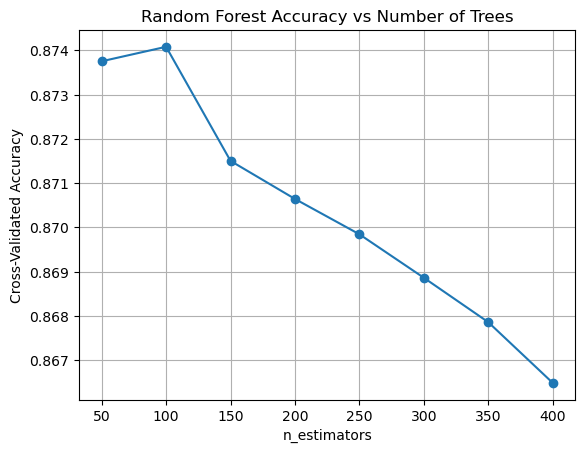

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()), marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Random Forest Accuracy vs Number of Trees')
plt.grid(True)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# Set best n_estimators in pipeline
best_pipeline.set_params(classifier__n_estimators=best_n)

# Fit model
best_pipeline.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = best_pipeline.predict(val_X)

print("Accuracy on validation set:", accuracy_score(val_y, val_predictions))

Accuracy on validation set: 0.8730652690197364


/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:39:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [15]:
from sklearn.metrics import classification_report
print(classification_report(val_y, val_predictions))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      9273
           1       0.78      0.66      0.71      2938

    accuracy                           0.87     12211
   macro avg       0.84      0.80      0.82     12211
weighted avg       0.87      0.87      0.87     12211



In [16]:
import joblib

# Save the trained pipeline
joblib.dump(best_pipeline, 'salary_prediction_model.joblib')

print("✅ Model saved as 'salary_prediction_model.joblib'")

✅ Model saved as 'salary_prediction_model.joblib'


In [17]:
import joblib

# Load the model
loaded_model = joblib.load('salary_prediction_model.joblib')

In [18]:
new_employee_df = pd.DataFrame({
    'age': [45],
    'workclass': ['Private'],
    'fnlwgt': [200000], 
    'education': ['Doctorate'],
    'educational-num': [16],
    'marital-status': ['Married-civ-spouse'],
    'occupation': ['Exec-managerial'],
    'relationship': ['Husband'],
    'race': ['White'],
    'gender': ['Male'],
    'capital-gain': [10000],
    'capital-loss': [0],
    'hours-per-week': [60],
    'native-country': ['United-States']
})


In [19]:

# Predict
prediction = loaded_model.predict(new_employee_df)
print("Prediction:", "Above 50K" if prediction[0] == 1 else "50K or less")


Prediction: Above 50K


In [27]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("salary_prediction_model.joblib")

st.set_page_config(page_title="Employee Salary Prediction", page_icon="💼", layout="centered")
st.title("💼 Employee Salary Prediction App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

st.sidebar.header("Input Employee Details")

# Sidebar Inputs
age = st.sidebar.slider("Age", 18, 70, 30)
workclass = st.sidebar.selectbox("Workclass", [
    "Private", "Self-emp-not-inc", "Self-emp-inc", "Federal-gov",
    "Local-gov", "State-gov", "Without-pay", "Never-worked"
])
education = st.sidebar.selectbox("Education", [
    "Bachelors", "HS-grad", "Some-college", "Masters", "Assoc-acdm",
    "Assoc-voc", "11th", "10th", "7th-8th", "Prof-school", "1st-4th"
])
educational_num = st.sidebar.slider("Education Number", 1, 16, 13)
occupation = st.sidebar.selectbox("Occupation", [
    "Tech-support", "Craft-repair", "Other-service", "Sales", "Exec-managerial",
    "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct", "Adm-clerical",
    "Farming-fishing", "Transport-moving", "Priv-house-serv", "Protective-serv", "Armed-Forces"
])
relationship = st.sidebar.selectbox("Relationship", [
    "Husband", "Wife", "Own-child", "Not-in-family", "Other-relative", "Unmarried"
])
marital_status = st.sidebar.selectbox("Marital Status", [
    "Married-civ-spouse", "Never-married", "Divorced", "Separated", "Widowed", "Married-spouse-absent"
])
race = st.sidebar.selectbox("Race", [
    "White", "Black", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other"
])
gender = st.sidebar.selectbox("Gender", ["Male", "Female"])
hours_per_week = st.sidebar.slider("Hours per Week", 1, 99, 40)
fnlwgt = st.sidebar.number_input("Final Weight", min_value=50000, max_value=1000000, value=200000)
capital_gain = st.sidebar.number_input("Capital Gain", min_value=0, max_value=100000, value=0)
capital_loss = st.sidebar.number_input("Capital Loss", min_value=0, max_value=5000, value=0)
native_country = st.sidebar.selectbox("Native Country", [
    "United-States", "India", "Mexico", "Philippines", "Germany", "Canada", "Iran",
    "Vietnam", "China", "Columbia", "Cuba", "England", "France", "Italy", "Japan"
])

# Create dataframe
input_df = pd.DataFrame([{
    'age': age,
    'workclass': workclass,
    'education': education,
    'educational-num': educational_num,
    'occupation': occupation,
    'hours-per-week': hours_per_week,
    'fnlwgt': fnlwgt,
    'capital-gain': capital_gain,
    'capital-loss': capital_loss,
    'relationship': relationship,
    'gender': gender,
    'marital-status': marital_status,
    'native-country': native_country,
    'race': race 
}])

# Show input
st.write("### 🔎 Input Data")
st.write(input_df)

# Predict button
if st.button("Predict Salary Class"):
    prediction = model.predict(input_df)
    st.success(f"✅ Prediction: {'>50K' if prediction[0] == 1 else '≤50K'}")

# Batch prediction section
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())
    batch_preds = model.predict(batch_data)
    batch_data['PredictedClass'] = batch_preds
    st.write("✅ Predictions:")
    st.write(batch_data.head())
    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')


Overwriting app.py
